In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [174]:
!pip install pyforest

from pyforest import *

lazy_imports()

['from sklearn.ensemble import GradientBoostingClassifier',
 'import datetime as dt',
 'import plotly as py',
 'import os',
 'import spacy',
 'from sklearn import svm',
 'import dash',
 'import sys',
 'import sklearn',
 'import statistics',
 'from sklearn.ensemble import RandomForestClassifier',
 'import awswrangler as wr',
 'import gensim',
 'import pydot',
 'from sklearn.ensemble import RandomForestRegressor',
 'import altair as alt',
 'from sklearn.manifold import TSNE',
 'from pathlib import Path',
 'import matplotlib as mpl',
 'import tensorflow as tf',
 'import plotly.express as px',
 'import glob',
 'from sklearn.preprocessing import OneHotEncoder',
 'import tqdm',
 'import lightgbm as lgb',
 'import nltk',
 'from dask import dataframe as dd',
 'from pyspark import SparkContext',
 'import plotly.graph_objs as go',
 'import keras',
 'from openpyxl import load_workbook',
 'import re',
 'from sklearn.model_selection import train_test_split',
 'import xgboost as xgb',
 'from sklearn

In [175]:
data = pd.read_csv('breastCancer.csv')

<IPython.core.display.Javascript object>

In [4]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  class              699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [8]:
data.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [10]:
data.shape

(699, 11)

In [11]:
data['bare_nucleoli']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [13]:
data['bare_nucleoli'][10:25]

10     1
11     1
12     3
13     3
14     9
15     1
16     1
17     1
18    10
19     1
20    10
21     7
22     1
23     ?
24     1
Name: bare_nucleoli, dtype: object

In [14]:
data['bare_nucleoli']=='?'

0      False
1      False
2      False
3      False
4      False
       ...  
694    False
695    False
696    False
697    False
698    False
Name: bare_nucleoli, Length: 699, dtype: bool

In [17]:
data[data['bare_nucleoli']=='?']

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [22]:
data[data['bare_nucleoli']=='?'].sum()

id                           13721250
clump_thickness                    54
size_uniformity                    39
shape_uniformity                   46
marginal_adhesion                  29
epithelial_size                    39
bare_nucleoli        ????????????????
bland_chromatin                    50
normal_nucleoli                    44
mitoses                            16
class                              36
dtype: object

In [32]:
data.bare_nucleoli

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nucleoli, Length: 699, dtype: object

In [37]:
data.bare_nucleoli.isdigit()

AttributeError: 'Series' object has no attribute 'isdigit'

In [38]:
data.bare_nucleoli.str.isdigit()

0      True
1      True
2      True
3      True
4      True
       ... 
694    True
695    True
696    True
697    True
698    True
Name: bare_nucleoli, Length: 699, dtype: bool

In [24]:
digit_in_bare_nucleoli = pd.DataFrame(data.bare_nucleoli.str.isdigit())

<IPython.core.display.Javascript object>

In [25]:
digit_in_bare_nucleoli

,bare_nucleoli
0,True
1,True
2,True
3,True
4,True
...,...
694,True
695,True
696,True
697,True


In [27]:
df = data.replace('?', np.nan)

<IPython.core.display.Javascript object>

In [28]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [34]:
df['bare_nucleoli'][10:25]

10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23    NaN
24      1
Name: bare_nucleoli, dtype: object

In [39]:
df.median()

id                   1171710.0
clump_thickness            4.0
size_uniformity            1.0
shape_uniformity           1.0
marginal_adhesion          1.0
epithelial_size            2.0
bare_nucleoli              1.0
bland_chromatin            3.0
normal_nucleoli            1.0
mitoses                    1.0
class                      2.0
dtype: float64

In [44]:
#df.replace('NAN',1)
df = df.fillna(df.median())

In [45]:
df['bare_nucleoli'][10:25]

10     1
11     1
12     3
13     3
14     9
15     1
16     1
17     1
18    10
19     1
20    10
21     7
22     1
23     1
24     1
Name: bare_nucleoli, dtype: object

In [48]:
df.dtypes

id                    int64
clump_thickness       int64
size_uniformity       int64
shape_uniformity      int64
marginal_adhesion     int64
epithelial_size       int64
bare_nucleoli        object
bland_chromatin       int64
normal_nucleoli       int64
mitoses               int64
class                 int64
dtype: object

In [49]:
df['bare_nucleoli'] = df['bare_nucleoli'].astype('int64')

In [50]:
df.dtypes

id                   int64
clump_thickness      int64
size_uniformity      int64
shape_uniformity     int64
marginal_adhesion    int64
epithelial_size      int64
bare_nucleoli        int64
bland_chromatin      int64
normal_nucleoli      int64
mitoses              int64
class                int64
dtype: object

In [51]:
#-----------------------------------------------------------------------------------------------------------------

## EDA

In [54]:
df.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [57]:
df.drop('id', axis = 1, inplace = True)

In [58]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
size_uniformity,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
shape_uniformity,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nucleoli,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


## bivariate data analysis

<IPython.core.display.Javascript object>

/home/vishwas/anaconda3/envs/E2EML/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

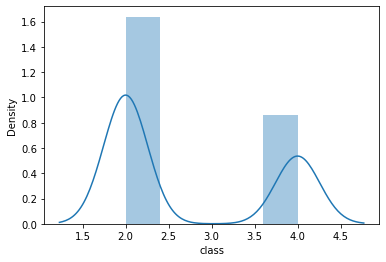

In [61]:
sns.distplot(df['class'])

## multivariate data analysis

array([[<AxesSubplot:title={'center':'clump_thickness'}>,
        <AxesSubplot:title={'center':'size_uniformity'}>,
        <AxesSubplot:title={'center':'shape_uniformity'}>],
       [<AxesSubplot:title={'center':'marginal_adhesion'}>,
        <AxesSubplot:title={'center':'epithelial_size'}>,
        <AxesSubplot:title={'center':'bare_nucleoli'}>],
       [<AxesSubplot:title={'center':'bland_chromatin'}>,
        <AxesSubplot:title={'center':'normal_nucleoli'}>,
        <AxesSubplot:title={'center':'mitoses'}>],
       [<AxesSubplot:title={'center':'class'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

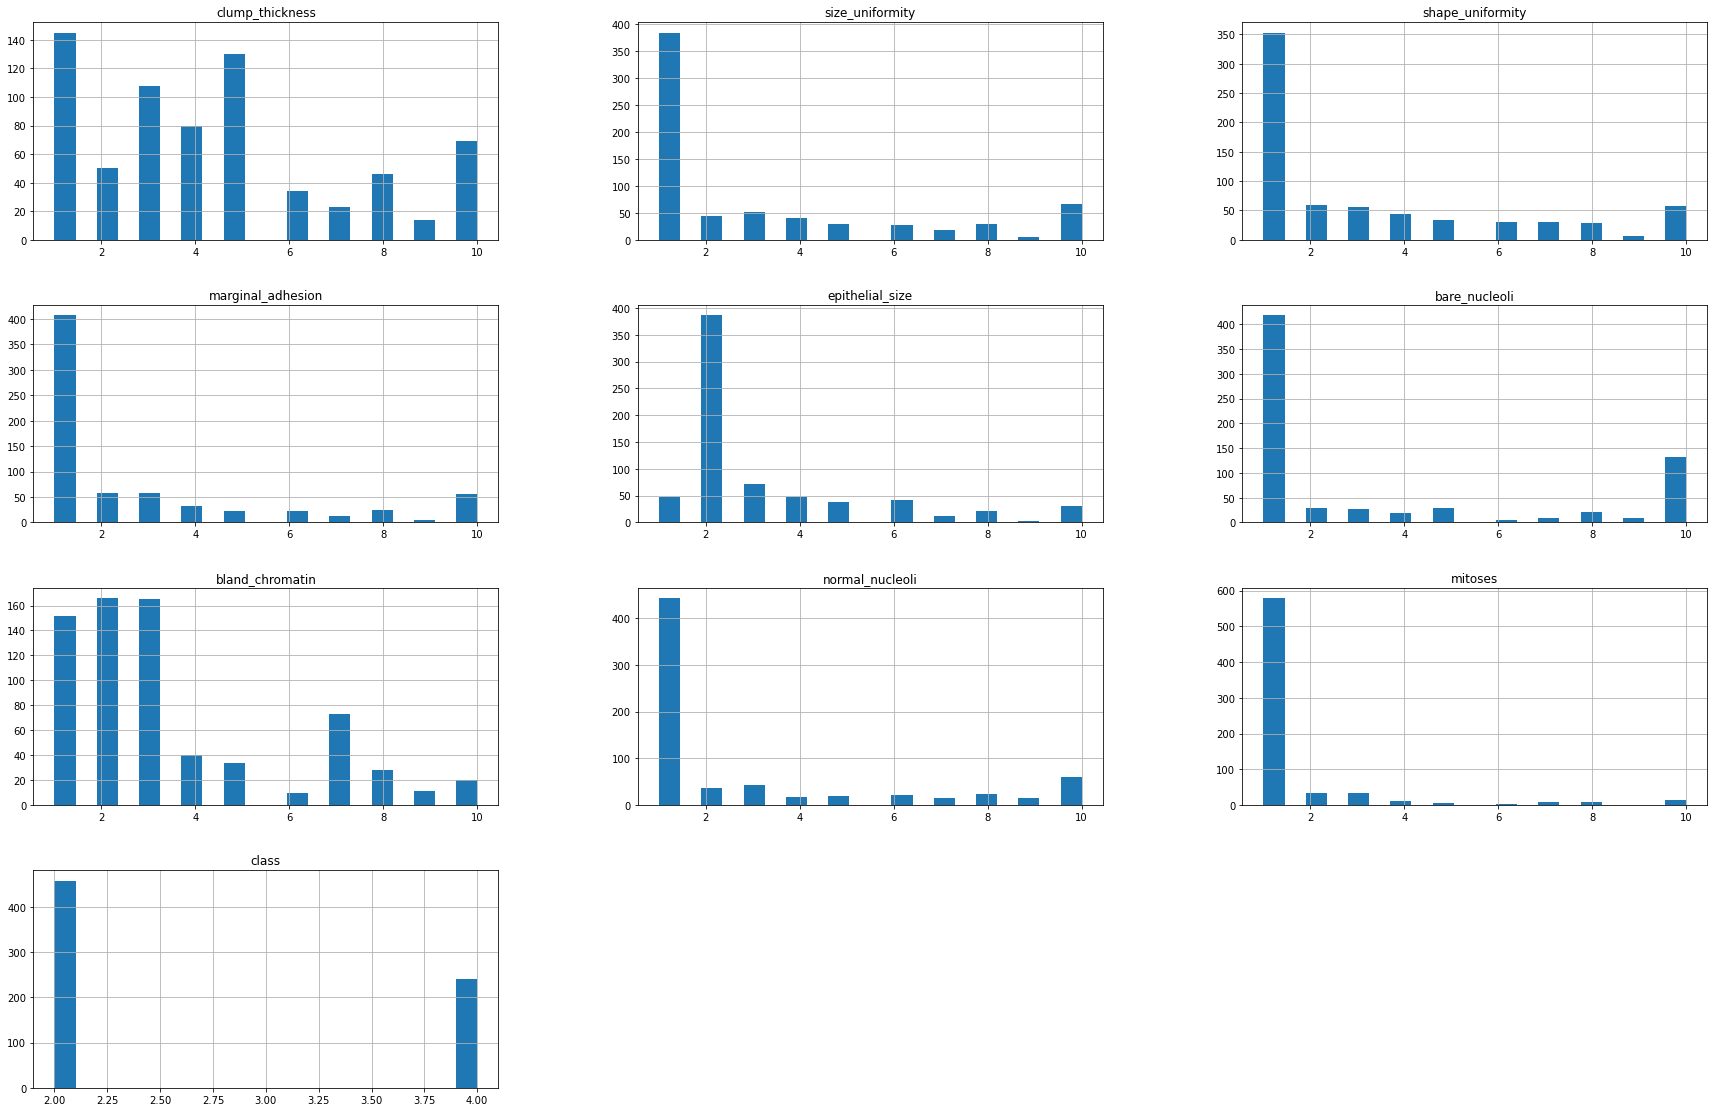

In [70]:
df.hist(bins=20, figsize=(30,30), layout=(6,3))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

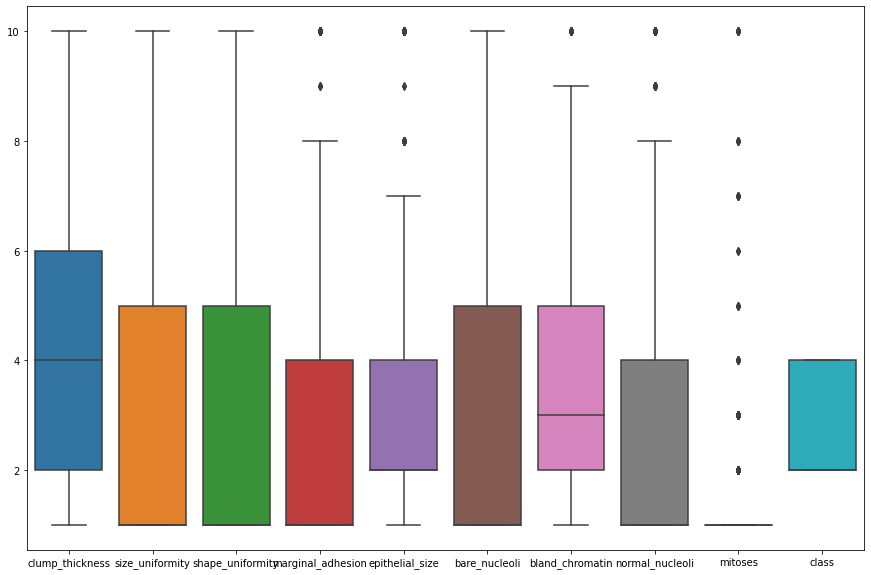

In [74]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

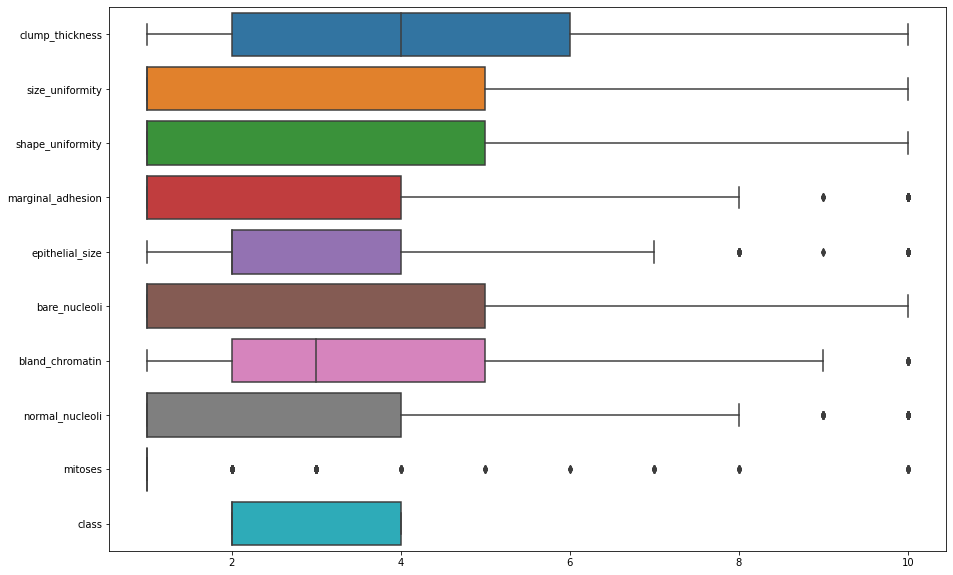

In [75]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, orient= 'h')

In [76]:
df.corr()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nucleoli,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

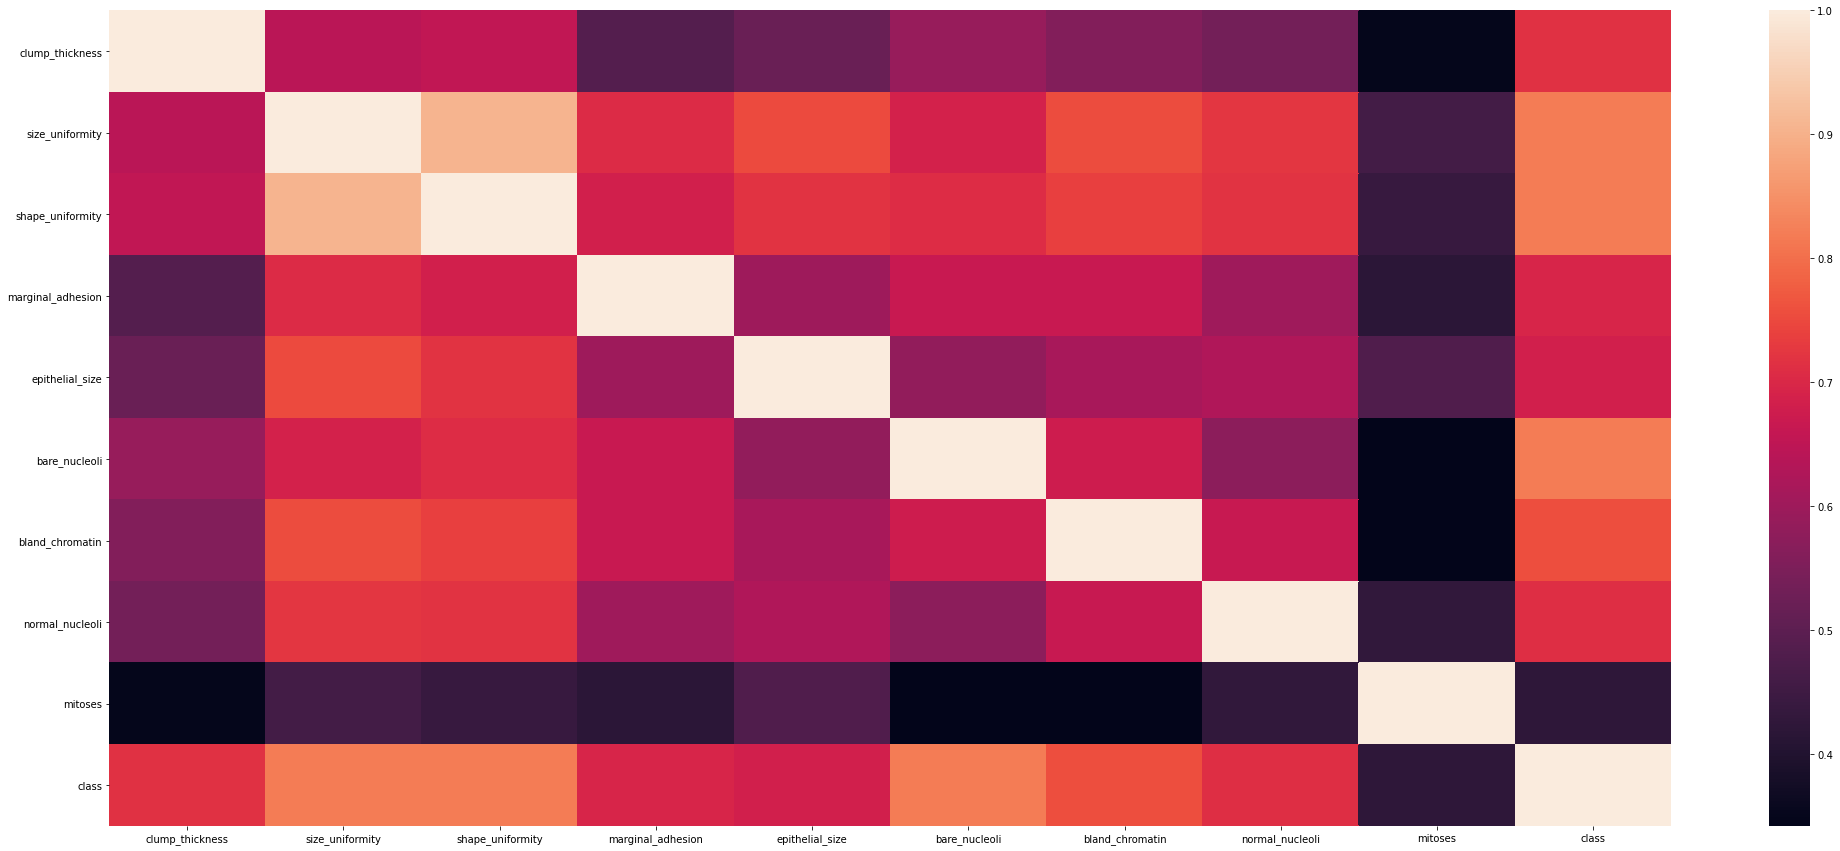

In [81]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'correlation between diff attribute')

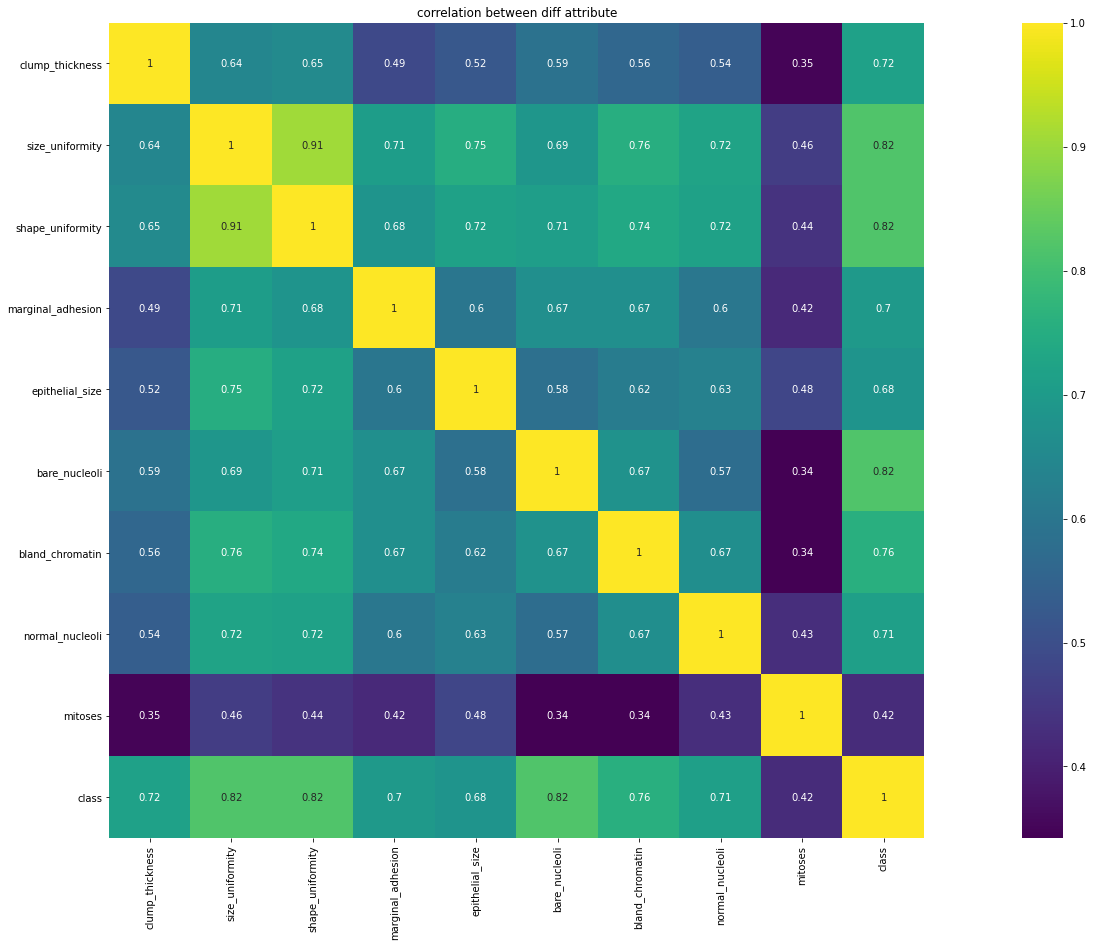

In [80]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(),vmax=1,square=True, annot=True, cmap= 'viridis')
plt.title('correlation between diff attribute')

<IPython.core.display.Javascript object>

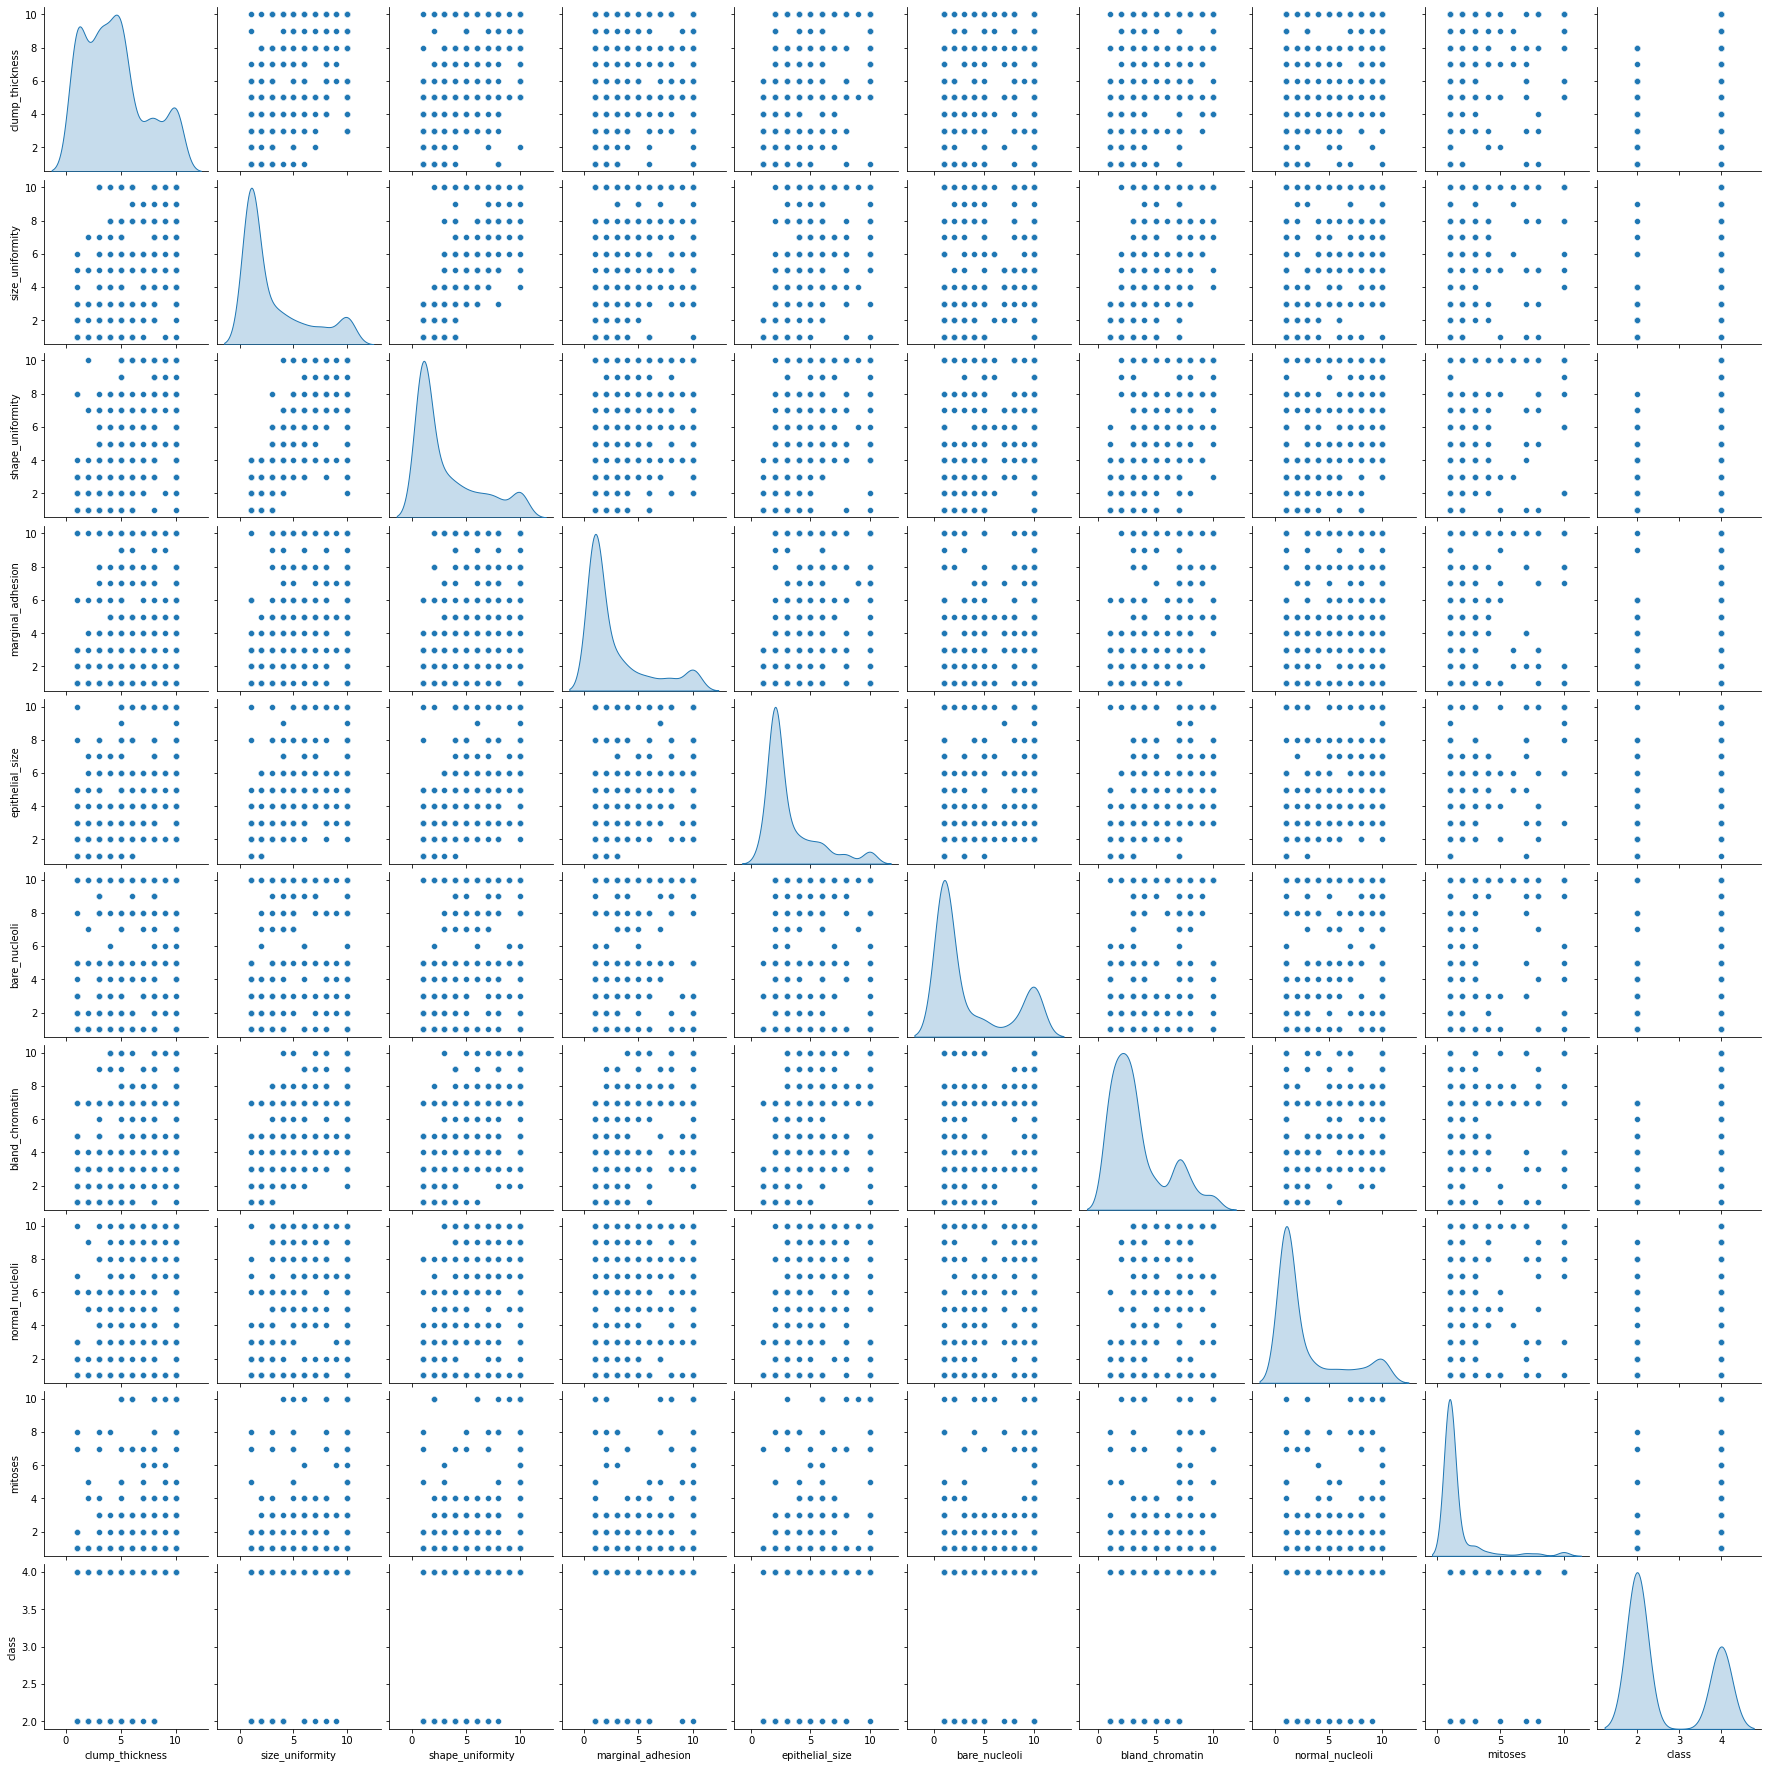

In [82]:
sns.pairplot(df, diag_kind='kde')

## model building

In [83]:
df.head()

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [88]:
X= df.drop('class', axis = 1)
y= df['class']

In [87]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state= 42)

In [127]:
y_test

158    2
499    2
396    2
155    4
321    2
      ..
11     2
659    2
567    2
178    2
533    2
Name: class, Length: 210, dtype: int64

# KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')

In [94]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [96]:
y_pred_knn = KNN.predict(X_test)

In [97]:
y_pred_knn

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2])

In [128]:
y_pred_knn.shape

(210,)

In [98]:
y_test

158    2
499    2
396    2
155    4
321    2
      ..
11     2
659    2
567    2
178    2
533    2
Name: class, Length: 210, dtype: int64

In [101]:
from scipy.stats import zscore

print('KNN algo is predicting at {0:.2g}% '.format(KNN.score(X_test,y_test)*100))

KNN algo is predicting at 98% 


# SVC

In [103]:
from sklearn.svm import SVC

In [110]:
svc = SVC()#gamma=0.025, C=3)
svc.fit(X_train,y_train)

SVC()

In [111]:
y_pred_svc = svc.predict(X_test)

In [112]:
y_pred_svc

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2,
       4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2])

In [113]:
from scipy.stats import zscore
print('SVC algo is predicting at {0:.2g}% '.format(svc.score(X_test,y_test)*100))

SVC algo is predicting at 97% 


In [114]:
svc_pred = pd.DataFrame(y_pred_svc)

<IPython.core.display.Javascript object>

In [115]:
knn_pred = pd.DataFrame(y_pred_knn)

<IPython.core.display.Javascript object>

In [129]:
knn_pred

,0
0,2
1,2
2,2
3,4
4,2
...,...
205,2
206,2
207,2
208,2


In [156]:
y_test_df = pd.DataFrame(y_test)
y_test_df

<IPython.core.display.Javascript object>

,class
158,2
499,2
396,2
155,4
321,2
...,...
11,2
659,2
567,2
178,2


In [157]:
y_test_df = y_test_df.reset_index()

In [158]:
y_test_df

,index,class
0,158,2
1,499,2
2,396,2
3,155,4
4,321,2
...,...,...
205,11,2
206,659,2
207,567,2
208,178,2


In [161]:
y_test_df = y_test_df.drop(['index'], axis=1)

In [162]:
y_test_df

,class
0,2
1,2
2,2
3,4
4,2
...,...
205,2
206,2
207,2
208,2


In [163]:
test_data = pd.concat([svc_pred, knn_pred, y_test_df], axis=1)

<IPython.core.display.Javascript object>

In [164]:
test_data

,0,0,class
0,2,2,2
1,2,2,2
2,2,2,2
3,4,4,4
4,2,2,2
...,...,...,...
205,2,2,2
206,2,2,2
207,2,2,2
208,2,2,2


In [165]:
test_data.columns = [['svc_pred', 'knn_pred', 'class']]

In [166]:
test_data

,svc_pred,knn_pred,class
0,2,2,2
1,2,2,2
2,2,2,2
3,4,4,4
4,2,2,2
...,...,...,...
205,2,2,2
206,2,2,2
207,2,2,2
208,2,2,2


In [167]:
from sklearn.metrics import classification_report

In [171]:
print('KNN classification report')
print('-----'*20)
print(classification_report(y_test, y_pred_knn))

KNN classification report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       143
           4       0.97      0.97      0.97        67

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



In [172]:
print('SVC classification report')
print('-----'*20)
print(classification_report(y_test, y_pred_svc))

SVC classification report
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           2       0.98      0.98      0.98       143
           4       0.96      0.96      0.96        67

    accuracy                           0.97       210
   macro avg       0.97      0.97      0.97       210
weighted avg       0.97      0.97      0.97       210



confusion matrix for knn
[[141   2]
 [  2  65]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

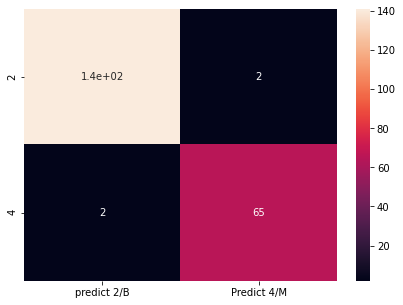

In [188]:
from sklearn import metrics 

print('confusion matrix for knn')
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[2,4])
print(cm)
df_cm = pd.DataFrame(cm, index= [i for i in [2,4]], columns = [i for i in ['predict 2/B', 'Predict 4/M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot= True)

confusion matrix for SVC
[[140   3]
 [  3  64]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

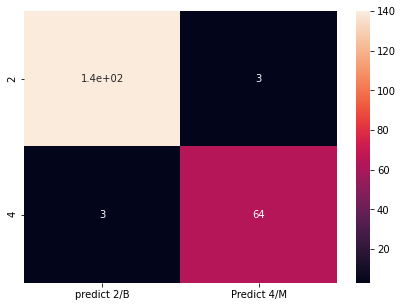

In [189]:
print('confusion matrix for SVC')
cm = metrics.confusion_matrix(y_test, y_pred_svc, labels=[2,4])
print(cm)
df_cm = pd.DataFrame(cm, index= [i for i in [2,4]], columns = [i for i in ['predict 2/B', 'Predict 4/M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot= True)